### Author: Suryavamsi

### t-SNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words.

## Here we are considering Word2Vec on Quora question pairs dataset

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('Quora_train.csv').sample(50000, random_state=23)

In [3]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,Is sex necessary in a relationship?,Why is sex important in a good relationship?,1
181001,181001,277377,277378,What are the most inspiring start up stories?,What are the most inspirational stories ever?,0
294691,294691,150129,93109,What is your best way to do digital marketing?,What are the best unique ways to do Digital Ma...,1
104145,104145,171986,171987,What is the best way to grow a Facebook fan page?,How do I get more followers on my Facebook page?,1
357893,357893,487310,487311,Suppose Host A sends two TCP segments back to ...,Suppose Host A sends two TCP segments back to ...,1


In [6]:
stop_words = nltk.corpus.stopwords.words()

def clean_sentence(data):
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', data).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in stop_words:
            sentence.remove(word)
    
    sentence = " ".join(sentence)
    
    return sentence

def clean_dataframe(df):
    df = df.dropna(how = 'any')
    
    for col in ['question1', 'question2']:
        df[col] = df[col].apply(clean_sentence)
    
    return df

train = clean_dataframe(train)
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex necessary relationship,sex important good relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories ever,0
294691,294691,150129,93109,best way digital marketing,best unique ways digital marketing,1
104145,104145,171986,171987,best way grow facebook fan page,get followers facebook page,1
357893,357893,487310,487311,suppose host sends two tcp segments back back ...,suppose host sends two tcp segments back back ...,1


In [7]:
# Building corpus

def build_corpus(data):
    corpus = []
    for col in ['question1','question2']:
        for sentence in data[col].iteritems():
            corpus.append(sentence[1].split(" "))
    return corpus

corpus = build_corpus(train)
corpus[:2]

[['sex', 'necessary', 'relationship'], ['inspiring', 'start', 'stories']]

In [8]:
# Now we need to train our Word2Vec model on the corpus
# Size refers to length of each word vector (also equal to number of neurons in hidden layer)
# Workers refer to number of CPU threads
model = word2vec.Word2Vec(sentences = corpus, size = 100, window = 20, min_count = 200, workers = 4)
model.wv['relationship']

array([ 0.38225549,  0.3146849 ,  0.15584682,  0.01962053, -0.18659513,
       -0.16232263, -0.16150807,  0.02216822, -0.80075467, -0.18978021,
        0.52901131, -0.10957105,  0.28302029, -0.1942579 ,  0.30729577,
       -0.47073036, -0.52277064,  0.08838858, -0.03711985,  0.31897029,
       -0.38844922, -0.27743024, -0.57188743, -0.25131357, -0.3275221 ,
        0.80353296, -0.31821978,  0.29153219,  0.29988548, -0.35509405,
        0.92233199,  0.09205881,  0.04639479, -0.11146442,  0.11059009,
       -0.34367633,  0.24588963,  0.02454842,  0.34806684,  0.53557062,
        0.19672182,  0.43666828, -0.00976694,  0.21399282, -0.26977021,
        0.08468743, -0.01088525,  0.32657996, -0.27454045, -0.16690981,
       -0.14257333, -0.29555997,  0.27431396, -0.11233137, -0.73229986,
       -0.65383589,  0.20421213, -0.13184795, -0.62920904,  0.09787393,
        0.27913117, -0.00850032,  0.84641457, -0.21335049,  0.17502548,
       -0.68546516, -0.53471297, -0.13508511,  0.54152441,  0.28

## Now we need to create t-SNE plot for the word embeddings

In [9]:
def t_sne_plot(model):
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/suryavamsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


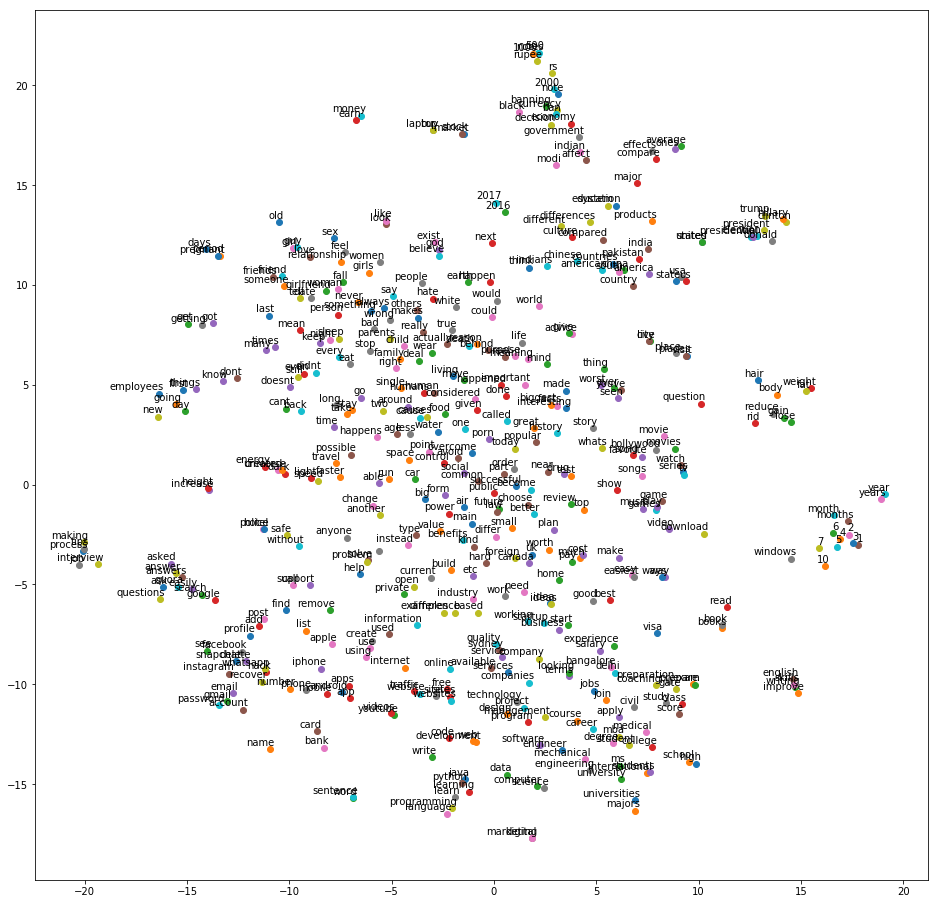

In [10]:
t_sne_plot(model)

/home/suryavamsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


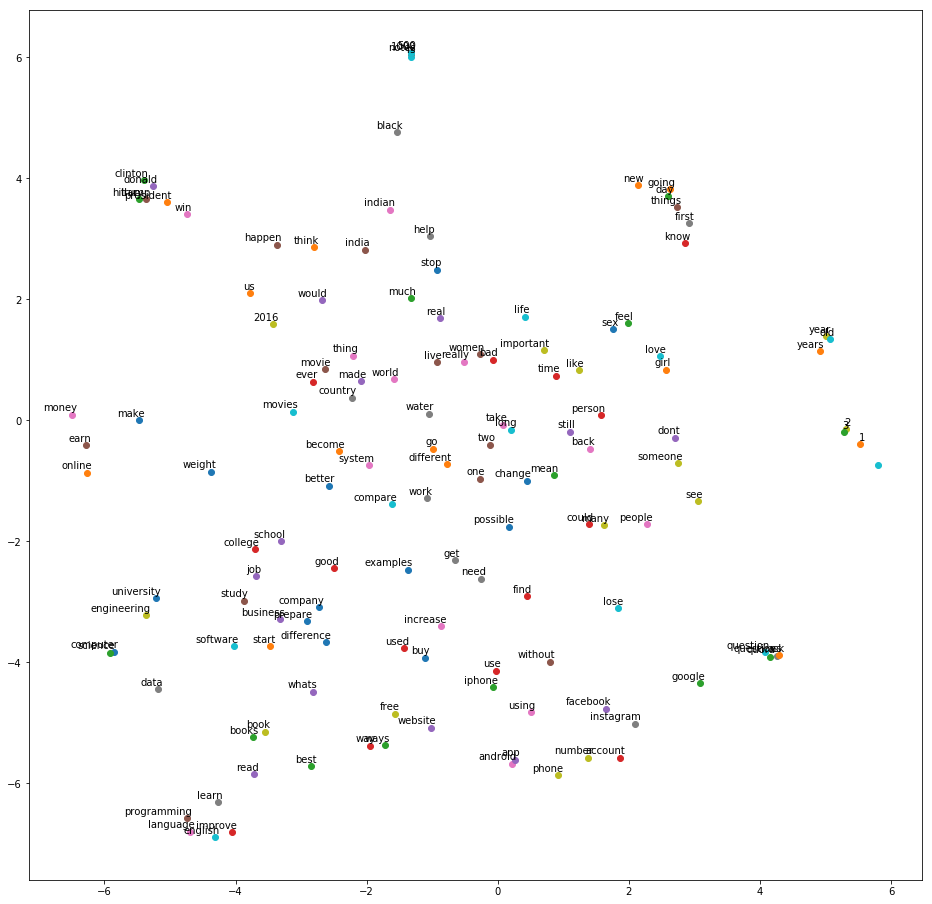

In [11]:
# min_count (int) – Ignores all words with total frequency lower than this.
# more selective model
model = word2vec.Word2Vec(sentences = corpus, size = 100, window = 20, min_count = 500, workers = 4)
t_sne_plot(model)

In [12]:
model.most_similar('iphone')

/home/suryavamsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('android', 0.9511197209358215),
 ('phone', 0.9504783749580383),
 ('use', 0.9288618564605713),
 ('using', 0.92806077003479),
 ('app', 0.9176843762397766),
 ('number', 0.9034857749938965),
 ('used', 0.871831476688385),
 ('get', 0.8601381778717041),
 ('find', 0.8530938625335693),
 ('facebook', 0.8491674065589905)]

In [13]:
model.most_similar('trump')

/home/suryavamsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('president', 0.9681702852249146),
 ('win', 0.9635463356971741),
 ('hillary', 0.9591782689094543),
 ('us', 0.9244105815887451),
 ('donald', 0.9235304594039917),
 ('clinton', 0.919843316078186),
 ('would', 0.89851975440979),
 ('2016', 0.8768740892410278),
 ('happen', 0.8731729984283447),
 ('country', 0.859843373298645)]

/home/suryavamsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


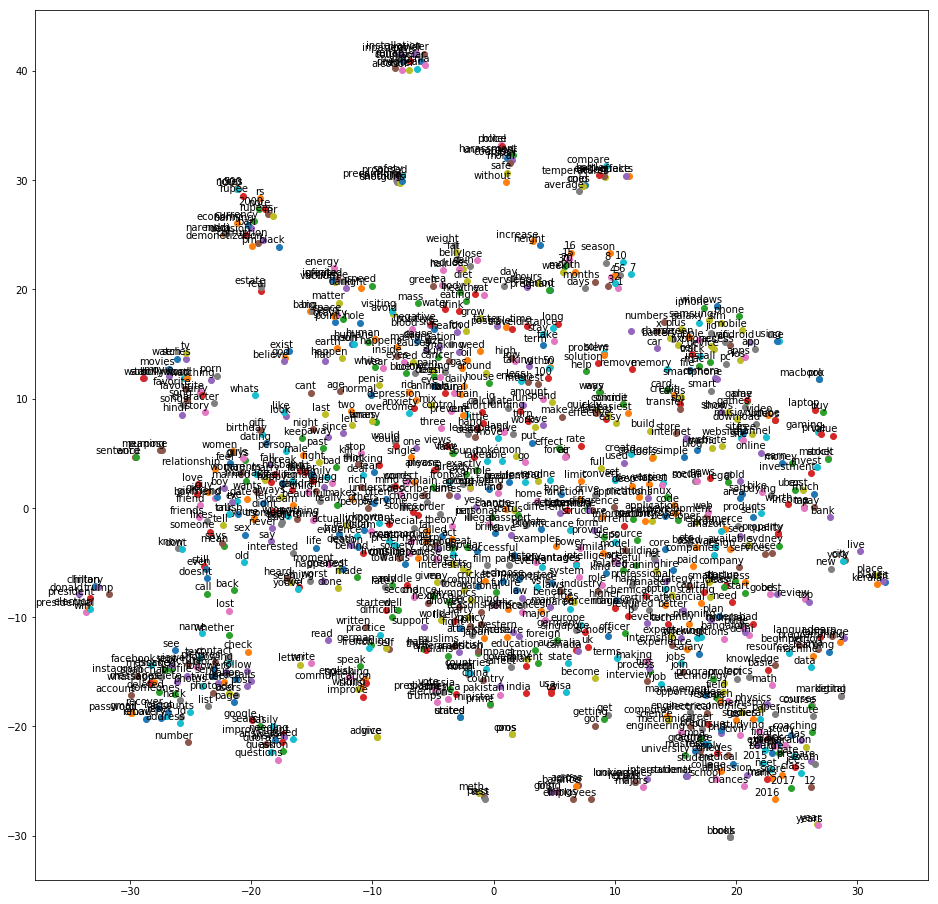

In [14]:
# Less selective model
model = word2vec.Word2Vec(sentences = corpus, size = 100, window = 20, min_count = 100, workers = 4)
t_sne_plot(model)

## Conclusion: As the model gets less selective the harder it becomes to understand the most similar words from a t-SNE plot